In [3]:
from env import GluttonousSnake
from agentnet import PPO,SAC
from trainfunction import train_on_policy_agent,train_off_policy_agent,ReplayBuffer
import torch
import matplotlib.pyplot as plt
import numpy as np

pygame 2.0.3 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
critic_lr = 1e-3
actor_lr=1e-4
hidden_dim = 128
gamma = 0.94
lmbda=0.92
epochs=25
eps=0.3
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")
state_dim = 6
action_dim=4
agent = PPO(state_dim, hidden_dim, action_dim,actor_lr, critic_lr,gamma,lmbda,epochs,eps, device)#重头训练

In [6]:
env=GluttonousSnake(True,state_dim=state_dim)
env.reset()
num_episodes = 1000
return_list=train_on_policy_agent(env,agent,num_episodes,5000)

Iteration 9: 100%|██████████| 100/100 [03:40<00:00,  2.21s/it, episode=1000, return=9.900]


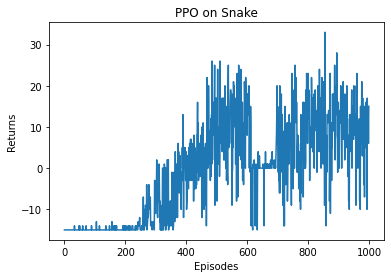

In [7]:
plt.plot(np.array(return_list).reshape(len(return_list)))
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('PPO on Snake')
plt.savefig('ppo.png',dpi=500)
plt.show()

In [4]:
actor_lr = 1e-4
critic_lr = 1e-3
alpha_lr = 5e-3
hidden_dim = 128
gamma = 0.94
tau = 0.005  # 软更新参数
buffer_size = 10000
minimal_size = 640
batch_size = 128*4
target_entropy = -5
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

replay_buffer = ReplayBuffer(buffer_size)
state_dim = 6
action_dim = 4
agent = SAC(state_dim, hidden_dim, action_dim, actor_lr, critic_lr, alpha_lr,
            target_entropy, tau, gamma, device)

In [5]:
env=GluttonousSnake(True,state_dim=state_dim)
env.reset()
num_episodes = 4000
return_list=train_off_policy_agent(env,agent,num_episodes,replay_buffer,minimal_size,batch_size,6000)

Iteration 9: 100%|██████████| 400/400 [01:33<00:00,  4.26it/s, episode=4000, return=0.000] 


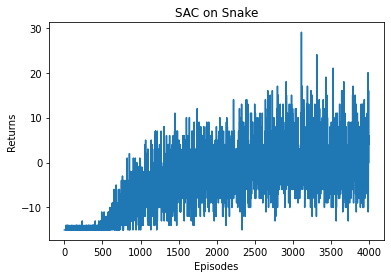

In [6]:
plt.plot(np.array(return_list).reshape(len(return_list)))
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('SAC on Snake')
plt.savefig('SAC.png',dpi=500)
plt.show()